In [1]:
import requests
import json
from pprint import pprint
import pandas as pd
import matplotlib as plt
from config import api_key

In [2]:
headers = {'Authorization': 'Bearer %s' % api_key}

In [4]:
states = ['Alabama','Alaska','Arizona','Arkansas','California','Colorado','Connecticut','Delaware','Florida','Georgia','Hawaii',
         ' Idaho','Indiana','Iowa','Kansas','Kentucky','Louisiana','Maine','Maryland','Massachusetts','Michigan','Minnesota',
          'Mississippi','Missouri','Montana','Nebraska','Nevada','New Hampshire','New Jersey','New Mexico'',New York','North Carolina',
          'North Dakota','Ohio','Oklahoma','Oregon','Pennsylvania','Rhode Island','South Carolina',
          'South Dakota','Tennessee','Texas','Utah','Vermont','Virginia','Washington','West Virginia','Wisconsin','Wyoming']
url='https://api.yelp.com/v3/businesses/search'
s_name = []
s_city =[]
s_state = []
s_category =[]
s_p = []
s_rating=[]
s_review = []
lat = []
lng = []
j=0

for s in states:
    
    param = {'location':s,'limit':'10','term':'wineries','price':'1,2,3,4'}
    responses=requests.get(url, params=param, headers=headers).json()
    j=0
    
    for bus in responses['businesses']:
        
        try:

            s_name.append(responses['businesses'][j]['name'])
            s_city.append(responses['businesses'][j]['location']['city'])
            s_state.append(responses['businesses'][j]['location']['state'])
            s_category.append(responses['businesses'][j]['categories'])
            s_rating.append(responses['businesses'][j]['rating'])
            s_review.append(responses['businesses'][j]['review_count'])
            s_p.append(responses['businesses'][j]['price'])
            lat.append(responses['businesses'][j]['coordinates']['latitude'])
            lng.append(responses['businesses'][j]['coordinates']['longitude'])
        except:
            lat.append("")
            lng.append("")
            s_p.append("")
        j+=1
            

    

df = pd.DataFrame({"Business Name":s_name,"City":s_city,"State":s_state,"Category":s_category,"Review Count":s_review,"Rating":s_rating,"Lat":lat,"Lng":lng, "Price":s_p})

df

,Business Name,City,State,Category,Review Count,Rating,Lat,Lng,Price
0,Cat-n-Bird Winery,Chelsea,AL,"[{'alias': 'wineries', 'title': 'Wineries'}, {...",20,5.0,33.350860,-86.654430,$$
1,Ozan Vineyard & Winery,Calera,AL,"[{'alias': 'winetours', 'title': 'Wine Tours'}...",33,4.0,33.102898,-86.716510,$$
2,Corbin Farms Winery,Calera,AL,"[{'alias': 'newamerican', 'title': 'American (...",44,4.5,33.175772,-86.775198,$$
3,Morgan Creek Vineyards,Harpersville,AL,"[{'alias': 'wineries', 'title': 'Wineries'}, {...",19,4.0,33.326640,-86.456760,$$
4,Hidden Meadow Vineyard,Jemison,AL,"[{'alias': 'winetastingroom', 'title': 'Wine T...",2,3.0,32.959870,-86.747800,$
...,...,...,...,...,...,...,...,...,...
363,The Village Cheese Shop,Wauwatosa,WI,"[{'alias': 'cheese', 'title': 'Cheese Shops'},...",17,4.5,43.050250,-88.008210,$$
364,Cooper's Hawk Winery & Restaurant - Brookfield,Brookfield,WI,"[{'alias': 'newamerican', 'title': 'American (...",354,4.0,43.031227,-88.108790,$$$
365,Chiselled Grape Winery,Cedarburg,WI,"[{'alias': 'wineries', 'title': 'Wineries'}]",29,4.0,43.301528,-87.989784,$$
366,Crush Wine Bar,Muskego,WI,"[{'alias': 'wine_bars', 'title': 'Wine Bars'},...",1,5.0,42.910487,-88.124847,$$


In [7]:
df.to_csv('df.csv')

In [14]:
df['Price Numerical'] =""
for index, row in df.iterrows():
    if df.loc[index,'Price'] == "$":
        df.loc[index,'Price Numerical'] = 1
    elif df.loc[index,'Price'] == "$$":
        df.loc[index,'Price Numerical'] = 2
    elif df.loc[index,'Price'] == "$$$":
        df.loc[index,'Price Numerical'] = 3
    elif df.loc[index,'Price'] == "$$$$":
        df.loc[index,'Price Numerical'] = 4
df

,Business Name,City,State,Category,Review Count,Rating,Lat,Lng,Price,Price Numerical,Region
0,Cat-n-Bird Winery,Chelsea,AL,"[{'alias': 'wineries', 'title': 'Wineries'}, {...",20,5.0,33.350860,-86.654430,$$,2,S
1,Ozan Vineyard & Winery,Calera,AL,"[{'alias': 'winetours', 'title': 'Wine Tours'}...",33,4.0,33.102898,-86.716510,$$,2,S
2,Corbin Farms Winery,Calera,AL,"[{'alias': 'newamerican', 'title': 'American (...",44,4.5,33.175772,-86.775198,$$,2,S
3,Morgan Creek Vineyards,Harpersville,AL,"[{'alias': 'wineries', 'title': 'Wineries'}, {...",19,4.0,33.326640,-86.456760,$$,2,S
4,Hidden Meadow Vineyard,Jemison,AL,"[{'alias': 'winetastingroom', 'title': 'Wine T...",2,3.0,32.959870,-86.747800,$,1,S
...,...,...,...,...,...,...,...,...,...,...,...
363,The Village Cheese Shop,Wauwatosa,WI,"[{'alias': 'cheese', 'title': 'Cheese Shops'},...",17,4.5,43.050250,-88.008210,$$,2,N
364,Cooper's Hawk Winery & Restaurant - Brookfield,Brookfield,WI,"[{'alias': 'newamerican', 'title': 'American (...",354,4.0,43.031227,-88.108790,$$$,3,N
365,Chiselled Grape Winery,Cedarburg,WI,"[{'alias': 'wineries', 'title': 'Wineries'}]",29,4.0,43.301528,-87.989784,$$,2,N
366,Crush Wine Bar,Muskego,WI,"[{'alias': 'wine_bars', 'title': 'Wine Bars'},...",1,5.0,42.910487,-88.124847,$$,2,N


In [15]:
north = ['IL', 'IN', 'MI', 'MN', 'OH', 'WI']
northeast = ['CT', 'ME', 'MA', 'NH', 'RI', 'VT', 'NJ', 'NY', 'PA']
south = ['AR', 'LA', 'OK', 'TX', 'AL', 'FL', 'GA', 'MS', 'SC']
midsouth = ['DE', 'DC', 'KY', 'MD', 'NC', 'TN', 'VA', 'WV']
midwest = ['IA', 'KS', 'MO', 'NE', 'ND', 'SD']
west = ['CA', 'HI', 'NV', 'AZ', 'CO', 'ID', 'MT', 'NM', 'UT', 'WY']
northwest = ['OR', 'WA', 'AK']
df['Region']=""

for index, r in df.iterrows():
    if r['State'] in north:
        df.loc[index,'Region'] = "N"
    elif r['State'] in northeast:
        df.loc[index,'Region'] = "NE"
    elif r['State'] in south:
        df.loc[index,'Region'] = "S"
    elif r['State'] in midsouth:
        df.loc[index,'Region'] = "MS"
    elif r['State'] in midwest:
        df.loc[index,'Region'] = "MW"
    elif r['State'] in west:
        df.loc[index,'Region'] = "W"
    else:
        df.loc[index,'Region'] = "NE"
    
    
df


,Business Name,City,State,Category,Review Count,Rating,Lat,Lng,Price,Price Numerical,Region
0,Cat-n-Bird Winery,Chelsea,AL,"[{'alias': 'wineries', 'title': 'Wineries'}, {...",20,5.0,33.350860,-86.654430,$$,2,S
1,Ozan Vineyard & Winery,Calera,AL,"[{'alias': 'winetours', 'title': 'Wine Tours'}...",33,4.0,33.102898,-86.716510,$$,2,S
2,Corbin Farms Winery,Calera,AL,"[{'alias': 'newamerican', 'title': 'American (...",44,4.5,33.175772,-86.775198,$$,2,S
3,Morgan Creek Vineyards,Harpersville,AL,"[{'alias': 'wineries', 'title': 'Wineries'}, {...",19,4.0,33.326640,-86.456760,$$,2,S
4,Hidden Meadow Vineyard,Jemison,AL,"[{'alias': 'winetastingroom', 'title': 'Wine T...",2,3.0,32.959870,-86.747800,$,1,S
...,...,...,...,...,...,...,...,...,...,...,...
363,The Village Cheese Shop,Wauwatosa,WI,"[{'alias': 'cheese', 'title': 'Cheese Shops'},...",17,4.5,43.050250,-88.008210,$$,2,N
364,Cooper's Hawk Winery & Restaurant - Brookfield,Brookfield,WI,"[{'alias': 'newamerican', 'title': 'American (...",354,4.0,43.031227,-88.108790,$$$,3,N
365,Chiselled Grape Winery,Cedarburg,WI,"[{'alias': 'wineries', 'title': 'Wineries'}]",29,4.0,43.301528,-87.989784,$$,2,N
366,Crush Wine Bar,Muskego,WI,"[{'alias': 'wine_bars', 'title': 'Wine Bars'},...",1,5.0,42.910487,-88.124847,$$,2,N


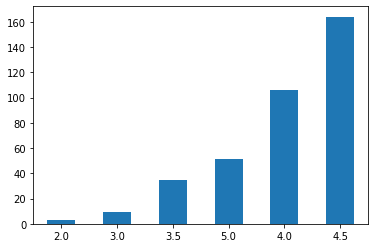

In [16]:
rate = df['Rating'].value_counts().sort_values()
rate.plot( kind='bar', rot=0)



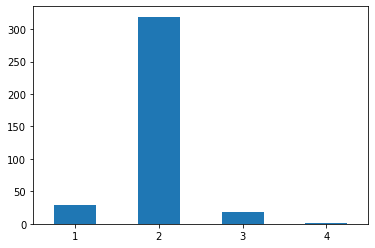

In [17]:
price = df['Price Numerical'].value_counts().sort_index()
price.plot(kind='bar',rot=0)


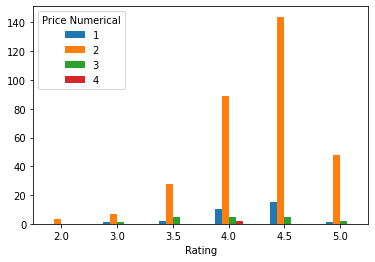

In [18]:
rate_price= df[['Rating','Price Numerical']].groupby('Rating')['Price Numerical'].value_counts().unstack()
rate_price.plot(kind='bar', rot=0)




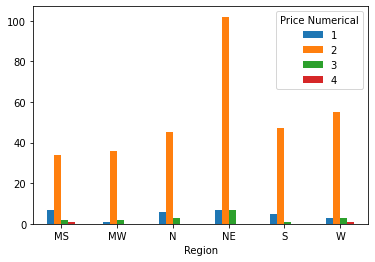

In [19]:
region_price = df[['Region','Price Numerical']].groupby('Region')['Price Numerical'].value_counts().unstack()
region_price.plot(kind='bar', rot=0)

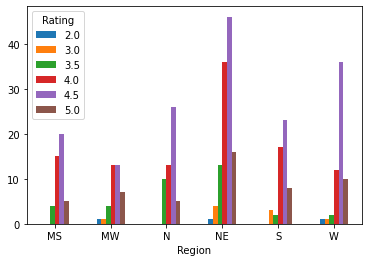

In [20]:
region_rate = df[['Region','Rating']].groupby('Region')['Rating'].value_counts().unstack()
region_rate.plot(kind='bar', rot=0)

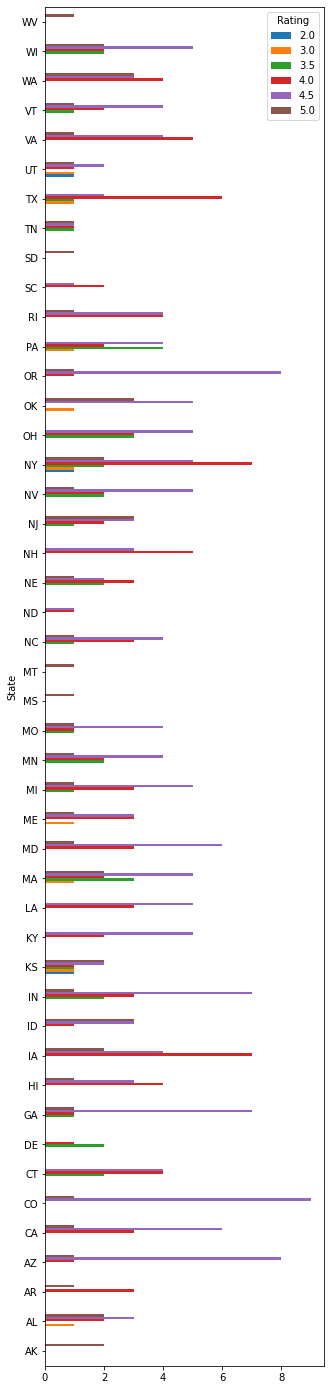

In [33]:
region_rate = df[['State','Rating']].groupby('State')['Rating'].value_counts().unstack()
region_rate.plot(kind='barh',figsize=(5,25))
